这是一个测试
# 数据准备

In [9]:
import pandas as pd
import requests
from io import StringIO

url = "https://cdn.aibydoing.com/aibydoing/files/challenge-2-bitcoin.csv"

# 模拟浏览器头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# 发送HTTP请求并获取响应
response = requests.get(url, headers=headers)

# 将响应内容解析为DataFrame
df = pd.read_csv(StringIO(response.text))

df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


我们只使用其中的 3 列，分布是：比特币市场价格、比特币总量、比特币交易费用。它们对应的列名依次为：btc_market_price，btc_total_bitcoins，btc_transaction_fees。

In [10]:
data = df[['btc_market_price','btc_total_bitcoins','btc_transaction_fees']]
data.head()

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0
1,0.0,2120200.0,0.0
2,0.0,2127600.0,0.0
3,0.0,2136100.0,0.0
4,0.0,2144750.0,0.0


下面，我们将 3 列数据，分别绘制在横向排列的 3 张子图中

Text(0, 0.5, 'btc_transaction_fees')

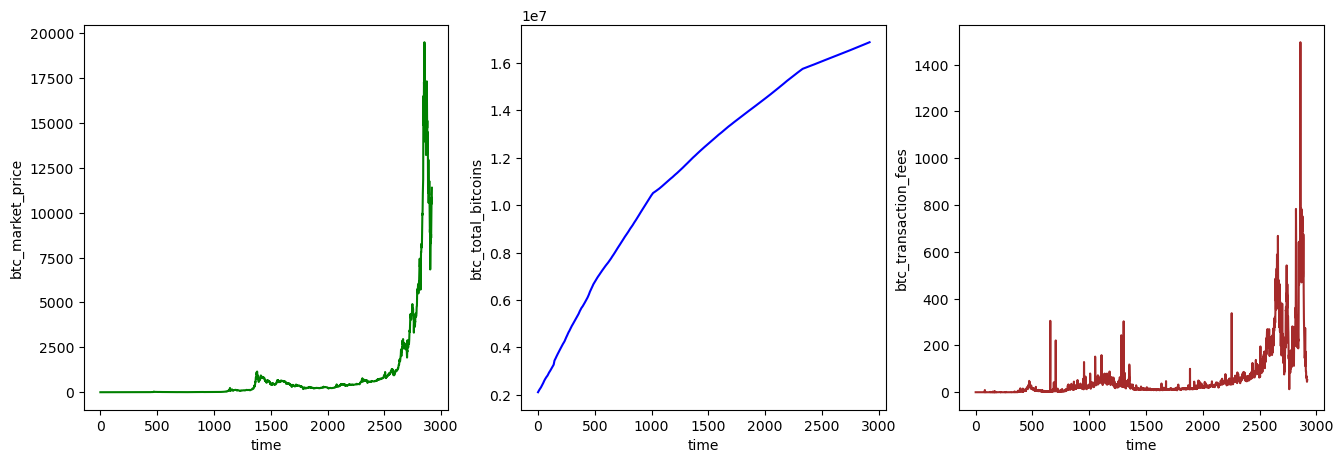

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(data['btc_market_price'], 'green')
axes[0].set_xlabel('time')
axes[0].set_ylabel('btc_market_price')

axes[1].plot(data['btc_total_bitcoins'], 'blue')
axes[1].set_xlabel('time')
axes[1].set_ylabel('btc_total_bitcoins')

axes[2].plot(data['btc_transaction_fees'], 'brown')
axes[2].set_xlabel('time')
axes[2].set_ylabel('btc_transaction_fees')

数据集的特征（Features）是「比特币总量」和「比特币交易费用」，而目标值为「比特币市场价格」。所以，下面将数据集拆分为训练集和测试集。其中，训练集占 70%，而测试集占 30%。

In [ ]:
def split_dataset():
    train_data = data[:int(len(data)*0.7)]
    test_data = data[int(len(data)*0.7):]
    
    X_train = train_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_train = train_data[['btc_market_price']]
    
    X_test = test_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_test = test_data[['btc_market_price']]
    
    return X_train, y_train, X_test, y_test

In [15]:
len(split_dataset()[0]), len(split_dataset()[1]), len(split_dataset()[2]), len(split_dataset()[
    3]), split_dataset()[0].shape, split_dataset()[1].shape, split_dataset()[2].shape, split_dataset()[3].shape

(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))

# 3次多项式回归预测

In [16]:
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 加载数据
X_train = split_dataset()[0]
y_train = split_dataset()[1]
X_test = split_dataset()[2]
y_test = split_dataset()[3]

In [19]:
def poly3():
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    poly_X_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.transform(X_test)
    model = LinearRegression()
    model.fit(poly_X_train, y_train)
    y_pred = model.predict(poly_X_test)
    mae = mean_absolute_error(y_test, y_pred.flatten())
    return mae

poly3()

1955.8027790570768

# N次多项式回归预测绘图

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def poly_plot(N):
    m = 1
    mse = []
    for m in range(N):
        model = make_pipeline(PolynomialFeatures(m), LinearRegression())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
        print(f"m={m}, MSE={mse[m]}")
    
    return mse

poly_plot(10)

m=0, MSE=20849128.89004295
m=1, MSE=24171680.63629423
m=2, MSE=16295500.637662267
m=3, MSE=13964187.666285705
m=4, MSE=23772258.751401
m=5, MSE=101204946.710902
m=6, MSE=364674459.0727007
m=7, MSE=925676933.02193
m=8, MSE=1769517474.328731
m=9, MSE=2789290963.82884


[20849128.89004295,
 24171680.63629423,
 16295500.637662267,
 13964187.666285705,
 23772258.751401,
 101204946.710902,
 364674459.0727007,
 925676933.02193,
 1769517474.328731,
 2789290963.82884]

m=0, MSE=20849128.89004295
m=1, MSE=24171680.63629423
m=2, MSE=16295500.637662267
m=3, MSE=13964187.666285705
m=4, MSE=23772258.751401
m=5, MSE=101204946.710902
m=6, MSE=364674459.0727007
m=7, MSE=925676933.02193
m=8, MSE=1769517474.328731
m=9, MSE=2789290963.82884


Text(0, 0.5, 'MSE')

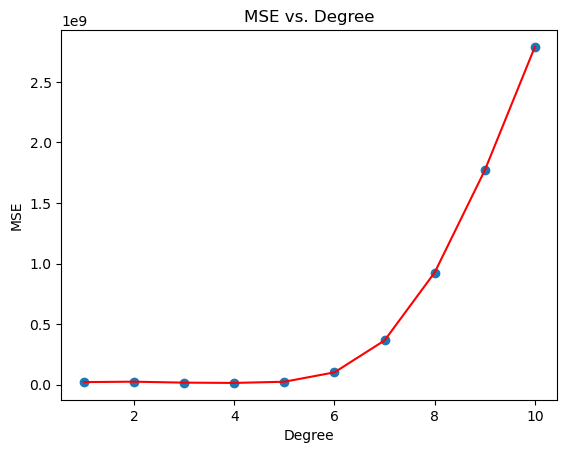

In [22]:
mse = poly_plot(10)
plt.plot([i for i in range(1, 11)],mse,'r')
plt.scatter([i for i in range(1, 11)],mse)

plt.title('MSE vs. Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')

